In [1]:
import requests


In [5]:
res = requests.post("http://localhost:8080/predictions/cifar/1.0", files={'data': open('test_image/10005_cat.png', 'rb')})

res.json()

{'cat': 0.5577710866928101,
 'truck': 0.16249018907546997,
 'automobile': 0.0796615481376648,
 'dog': 0.06280302256345749,
 'airplane': 0.05831320583820343}

In [8]:
res = requests.post("http://localhost:8080/explanations/cifar/1.0", files={'data': open('test_image/10005_cat.png', 'rb')})

ig = res.json()

In [10]:
ig

[[[-0.02164650436473681,
   -0.005189844706455591,
   0.0008299923180292419,
   -0.004194073043643075,
   -0.00533274651608144,
   -0.009788426150698422,
   0.004512580370308634,
   0.012398749946997318,
   -0.0038159679287798464,
   -0.017213669804659396,
   -0.009133890981261751,
   0.027055168462198013,
   0.03557923418304664,
   0.017199304145569545,
   0.007929333052639551,
   0.020677909325261656,
   0.036624110023873835,
   0.008016185052234056,
   -0.01765726995810644,
   -0.010362997485808908,
   -0.004536309445643127,
   0.0008801591715903222,
   0.0010902745196190407,
   0.001629903043767532,
   0.0013857035787280551,
   -0.00012365080197991336,
   7.460475101799533e-05,
   -6.939499503307317e-05],
  [-0.010879971684513174,
   -0.004053350271072235,
   -0.0034415761793227012,
   -0.013357054560844633,
   -0.003808566482357978,
   0.0022115806569289686,
   0.025387499003768892,
   0.016898556454473305,
   -0.013118738515787891,
   -0.010347281507104171,
   0.0061418172439394,

In [12]:
import torch
import numpy as np
import torchvision.transforms as T

from PIL import Image

from captum.attr import visualization as viz

In [13]:
img_path = "test_image/10005_cat.png"

inp_image = Image.open(img_path)
to_tensor = T.Compose([
	T.Resize((28, 28)),
	T.ToTensor()
])
inp_image = to_tensor(inp_image)

inp_image = inp_image.numpy()
attributions = np.array(ig)

inp_image, attributions = inp_image.transpose(1, 2, 0), attributions.transpose(1, 2, 0)

In [14]:
inp_image.shape, attributions.shape

((28, 28, 3), (28, 28, 3))

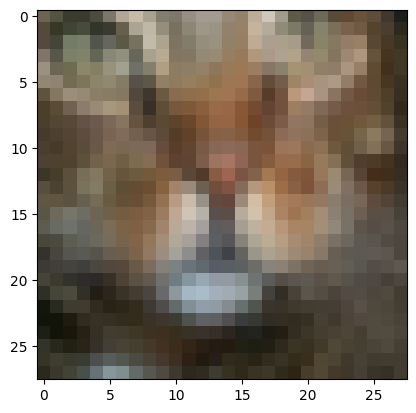

In [15]:
import matplotlib.pyplot as plt

plt.imshow(inp_image, cmap="inferno")

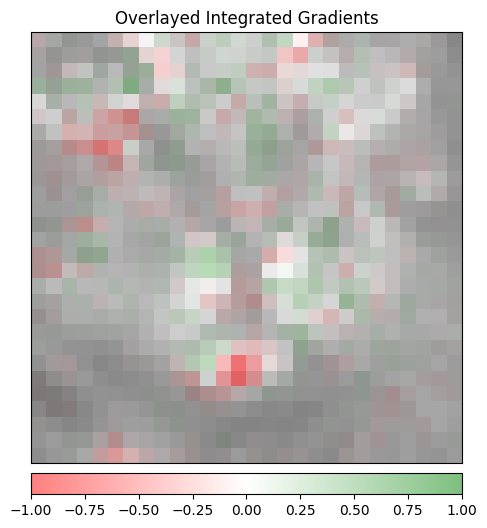

(<Figure size 600x600 with 2 Axes>,
 <AxesSubplot: title={'center': 'Overlayed Integrated Gradients'}>)

In [16]:
viz.visualize_image_attr(attributions, inp_image, method="blended_heat_map",sign="all", show_colorbar=True, title="Overlayed Integrated Gradients")